<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
from pandas import read_hdf
df_final_train = read_hdf('storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_train=df_final_train[['source_node', 'destination_node','indicator_link']]
df_test=df_final_test[['source_node', 'destination_node','indicator_link']]

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [ ]:
g_train=nx.from_pandas_edgelist(df_train, 'source_node', 'destination_node', ['indicator_link'])
g_test=nx.from_pandas_edgelist(df_test, 'source_node', 'destination_node', ['indicator_link'])

In [ ]:
G_train= nx.DiGraph(g_train)
G_test=nx.DiGraph(g_test)

In [ ]:
def preferential_for_followee(a,b):
    return G_train.in_degree(a)*G_train.in_degree(b)
def preferential_for_follower(a,b):
    return G_train.out_degree(a)*G_train.out_degree(b)

In [ ]:
list1=[]
list2=[]
for i in tqdm(range(df_train.shape[0])):
    list1.append(preferential_for_followee(df_train.iloc[i]['source_node'],df_train.iloc[i]['destination_node']))
    list2.append(preferential_for_follower(df_train.iloc[i]['source_node'],df_train.iloc[i]['destination_node']))

100%|██████████| 100002/100002 [01:20<00:00, 1238.75it/s]


In [ ]:
from sklearn.preprocessing import normalize
list1=np.array(list1)
list2=np.array(list2)
list1=list1.reshape(1,-1)
list2=list2.reshape(1,-1)
list1=normalize(list1)
list2=normalize(list2)

In [ ]:
l=df_final_train.columns

In [ ]:
l=l[-24:]

In [ ]:
lis=[]
lis1=[]
for i in tqdm(range(df_train.shape[0])):
    a=df_final_train.iloc[i][l[:6]]
    b=df_final_train.iloc[i][l[6:12]]
    c=df_final_train.iloc[i][l[12:18]]
    d=df_final_train.iloc[i][l[18:]]
    lis.append(np.dot(a,b))
    lis1.append(np.dot(c,d))


100%|██████████| 100002/100002 [05:47<00:00, 282.36it/s]


In [ ]:
lis=np.array(lis)
lis1=np.array(lis1)
lis=lis.reshape(1,-1)
lis1=lis1.reshape(1,-1)
lis=normalize(lis)
lis1=normalize(lis1)

In [ ]:
list1=list(list1[0])
list2=list(list2[0])
lis=list(lis[0])
lis1=list(lis1[0])

In [ ]:
p=pd.DataFrame({'preferential_followee':list1,'preferential_follower' : list2,'svd_dot_u':lis,'svd_dot_v' : lis1})

In [ ]:
p.head()

,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0.001709,0.001709,8.569434e-11,1.743321e-11
1,0.003419,0.003419,2.453958e-02,7.061761e-03
2,0.001709,0.001709,1.373853e-34,1.921719e-35
3,0.001709,0.001709,3.620339e-19,2.460196e-17
4,0.001709,0.001709,5.974968e-13,0.000000e+00


In [ ]:
x_train=pd.concat([df_final_train,p],axis=1)

In [ ]:
x_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0.001709,0.001709,8.569434e-11,1.743321e-11
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0.003419,0.003419,2.453958e-02,7.061761e-03
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0.001709,0.001709,1.373853e-34,1.921719e-35
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0.001709,0.001709,3.620339e-19,2.460196e-17
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.001709,0.001709,5.974968e-13,0.000000e+00


In [ ]:
def preferential_for_followee(a,b):
    return G_test.in_degree(a)*G_test.in_degree(b)
def preferential_for_follower(a,b):
    return G_test.out_degree(a)*G_test.out_degree(b)

In [ ]:
list1=[]
list2=[]
for i in tqdm(range(df_test.shape[0])):
    list1.append(preferential_for_followee(df_test.iloc[i]['source_node'],df_test.iloc[i]['destination_node']))
    list2.append(preferential_for_follower(df_test.iloc[i]['source_node'],df_test.iloc[i]['destination_node']))

100%|██████████| 50002/50002 [00:40<00:00, 1237.14it/s]


In [ ]:
lis=[]
lis1=[]
for i in tqdm(range(df_test.shape[0])):
    a=df_final_test.iloc[i][l[:6]]
    b=df_final_test.iloc[i][l[6:12]]
    c=df_final_test.iloc[i][l[12:18]]
    d=df_final_test.iloc[i][l[18:]]
    lis.append(np.dot(a,b))
    lis1.append(np.dot(c,d))

100%|██████████| 50002/50002 [02:52<00:00, 289.34it/s]


In [ ]:
list1=np.array(list1)
list2=np.array(list2)
list1=list1.reshape(1,-1)
list2=list2.reshape(1,-1)
lis=normalize(lis)
list1=normalize(list1)

In [ ]:
list1=list(list1)
list2=list(list2)
lis=list(lis)
lis1=list(lis1)

In [ ]:
p=pd.DataFrame({'preferential_followee':list1,'preferential_follower' : list2,'svd_dot_u':lis,'svd_dot_v' : lis1})

In [ ]:
p.head()

,preferential_followee,preferential_follower,svd_dot_u,svd_dot_v
0,0.006621,0.006621,8.425267e-20,2.074808e-17
1,0.003311,0.003311,1.352160e-17,1.188376e-17
2,0.003311,0.003311,3.671980e-13,3.904885e-12
3,0.003311,0.003311,1.634044e-10,9.819784e-11
4,0.003311,0.003311,1.246700e-11,1.300892e-11


In [ ]:
x_test=pd.concat([df_final_test,p],axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)

    A =(((C.T)/(C.sum(axis=1))).T)

    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))

    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
clf=xgb.XGBClassifier(class_weight='balanced',n_jobs=-1)

from sklearn.model_selection import GridSearchCV
params_grid = {'n_estimators':  [5,10,50,100,200,500],
              'max_depth':[2,3,4,5,6,7,8,9,10]
               }
model=GridSearchCV(clf,params_grid,cv=3,scoring='neg_log_loss',n_jobs=-1)
model.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators

In [ ]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['n_estimators'] = 200
params['max_depth'] = 9

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))

[0]	train-logloss:0.460169	valid-logloss:0.48144
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.069386	valid-logloss:0.23549
[20]	train-logloss:0.049054	valid-logloss:0.345695
Stopping. Best iteration:
[7]	train-logloss:0.094157	valid-logloss:0.219041

The test log loss is: 0.39436775226287674


test confusion matrix


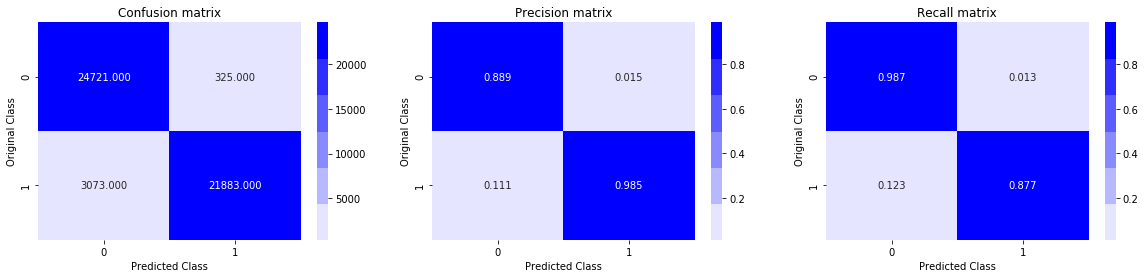

In [ ]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print('test confusion matrix')
plot_confusion_matrix(y_test, predicted_y)

train confusion matrix


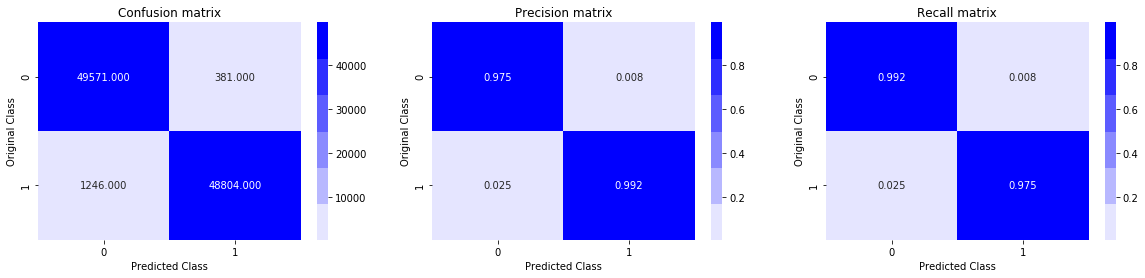

In [ ]:
predict_y = bst.predict(d_train)
predicted_y =np.array(predict_y>0.5,dtype=int)
print('train confusion matrix')
plot_confusion_matrix(y_train, predicted_y)

In [ ]:
clf=xgb.XGBClassifier(class_weight='balanced',n_estimator=200,max_depth=9,n_jobs=-1)
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimator=200,
              n_estimators=100, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

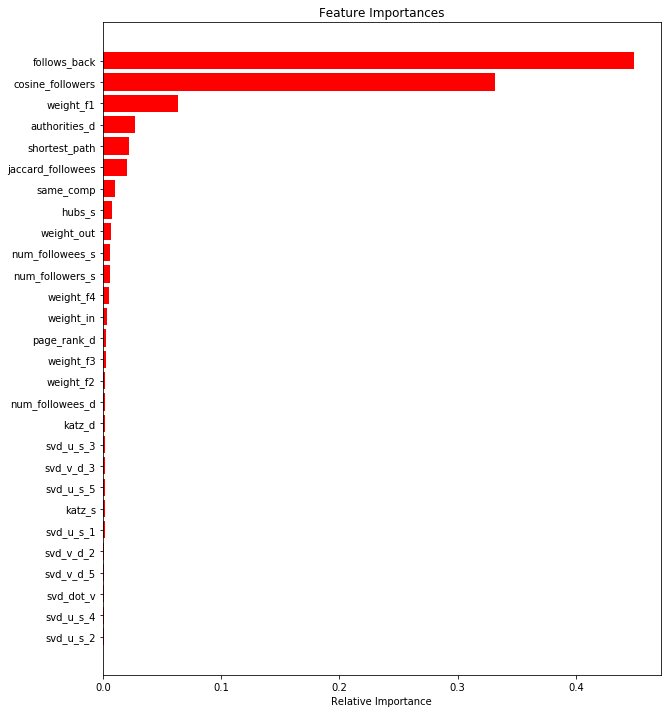

In [ ]:
features = x_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-28:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# CONCLUSIONS:

1.load the data into train and test datasets.

2.Preferential attachment:

  2.  1 write function to compute preferential attachment feature for two vertices,compute both in_degree or out degree,called two function as preferential_followee() and preferential_follower().

2. 2.to compute preferential feature,multiply both in_degrees or out_degress for two features.

2. 3 By passing two vertices at each time,find preferntial attachment features for both followee and followers.

2. 4 then normalise that features.

3.svd_dot Feature

3. 1.write function to  compute svd_dot feature,take 6_dimension vector of u and for both two vertices

3. 2 dot product both svd_v and svd_u of two vertces.

3. 3 normalise that feature.

4.append to test and train datasets that feature.

5.hyper tune xgboost ,get the best parameters.

In [ ]:
from prettytable import PrettyTable
m_table = PrettyTable()
m_table.field_names = ['model','n_estimators','max_depth','log_loss']
m_table.add_row(['Xg boost',200,9,0.39436775226287674])
print(m_table)

+----------+--------------+-----------+---------------------+
|  model   | n_estimators | max_depth |       log_loss      |
+----------+--------------+-----------+---------------------+
| Xg boost |     200      |     9     | 0.39436775226287674 |
+----------+--------------+-----------+---------------------+
